# Hiragana classification using a convolutional neural network #
This deep learning model uses 2D convolution layers to identify Japanese hiragana characters. The dataset used to train this model was taken from https://github.com/rois-codh/kmnist, using specifically the K49 dataset which consists of 232365 handwritten cursive hiragana characters with matching labels.

We first import the necessary libraries.

In [1]:
from tensorflow.keras import layers, models, utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

The images and labels are then loaded and normalized as numpy arrays.

In [13]:
characters = np.load('datasets/k49-train-imgs.npz')['arr_0']
labels = np.load('datasets/k49-train-labels.npz')['arr_0']

characters = characters.astype('float32')/255
labels = utils.to_categorical(labels)

characters.shape

(232365, 28, 28)

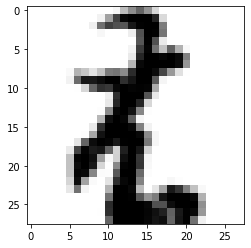

In [19]:
plt.imshow(characters[random.randint(0, characters.shape[0])], cmap='binary')
plt.show()

The model used is a convolutional neural network based on the one described in the book <i> Deep Learning with Python </i> by Francois Chollet with the dimension on the final output layer changed to (1, 49) to account for the 49 possible characters available.

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(49, activation='softmax'))

Model compilation and training.

In [5]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(characters, labels, epochs=15, batch_size=128)

Epoch 1/15
1816/1816 [==============================] - 17s 6ms/step - loss: 0.7471 - accuracy: 0.8031
Epoch 2/15
1816/1816 [==============================] - 11s 6ms/step - loss: 0.2754 - accuracy: 0.9232
Epoch 3/15
1816/1816 [==============================] - 11s 6ms/step - loss: 0.2025 - accuracy: 0.9435
Epoch 4/15
1816/1816 [==============================] - 11s 6ms/step - loss: 0.1654 - accuracy: 0.9534
Epoch 5/15
1816/1816 [==============================] - 11s 6ms/step - loss: 0.1420 - accuracy: 0.9603
Epoch 6/15
1816/1816 [==============================] - 11s 6ms/step - loss: 0.1250 - accuracy: 0.9647
Epoch 7/15
1816/1816 [==============================] - 11s 6ms/step - loss: 0.1129 - accuracy: 0.9683
Epoch 8/15
1816/1816 [==============================] - 11s 6ms/step - loss: 0.1010 - accuracy: 0.9711
Epoch 9/15
1816/1816 [==============================] - 11s 6ms/step - loss: 0.0918 - accuracy: 0.9737
Epoch 10/15
1816/1816 [==============================] - 10s 6ms/step - l

I've imported the label to character mappings to give an idea on how effectively the model can classify characters in the dataset it was trained on.

In [7]:
maps = pd.read_csv('datasets/k49_classmap.csv')

We pick 10 random characters and print out how they look as well as what the model predicts them to be.

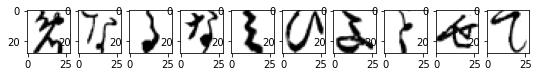

['め', 'な', 'る', 'な', 'み', 'ひ', 'よ', 'と', 'せ', 'て']


In [24]:
ten_chars = random.choices(characters, k=10)
predictions = []
ax, fig= plt.subplots(1,10)
ax.set_size_inches(9,9)
for idx, char in enumerate(ten_chars):
    fig[idx].imshow(char, cmap='binary')
    predictions.append(model.predict(char.copy().reshape(1, 28, 28, 1)).argmax())
plt.show()
print([maps['char'][pred] for pred in predictions])

Finally we run the model on the test dataset to determine its accuracy on new data.

In [10]:
test_characters = np.load('datasets/k49-test-imgs.npz')['arr_0']
test_labels = np.load('datasets/k49-test-labels.npz')['arr_0']

test_characters = test_characters.astype('float32')/255
test_labels = utils.to_categorical(test_labels)

In [12]:
model.evaluate(test_characters, test_labels)

1205/1205 [==============================] - 3s 2ms/step - loss: 0.4505 - accuracy: 0.9173


[0.45047837495803833, 0.9172957539558411]

We finally save the model for future usage.

In [22]:
#model.save('models/hiragana.h5')